In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Yelp

In [2]:
df = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)

In [3]:
df.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.columns = ['Review', 'Positive/Negative']

In [5]:
df.head()

,Review,Positive/Negative
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df['Positive/Negative'] == 0

0      False
1       True
2       True
3      False
4      False
5       True
6       True
7       True
8      False
9      False
10     False
11      True
12      True
13     False
14      True
15      True
16     False
17      True
18      True
19      True
20      True
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
970     True
971     True
972     True
973     True
974     True
975     True
976     True
977     True
978     True
979     True
980     True
981     True
982     True
983     True
984     True
985     True
986     True
987     True
988     True
989     True
990     True
991     True
992     True
993     True
994     True
995     True
996     True
997     True
998     True
999     True
Name: Positive/Negative, Length: 1000, dtype: bool

In [7]:
df[df['Positive/Negative'] == 0]

,Review,Positive/Negative
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
11,Would not go back.,0
12,The cashier had no care what so ever on what I...,0
14,I was disgusted because I was pretty sure that...,0
15,I was shocked because no signs indicate cash o...,0
17,Waitress was a little slow in service.,0


In [8]:
keywords = ['love', 'loved', 'great', 'awesome', 'good', 'nasty', 'not', 'bad', 'gross', 'overpriced', 'suck']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df['Review'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [9]:
df.dtypes

Review               object
Positive/Negative     int64
love                   bool
loved                  bool
great                  bool
awesome                bool
good                   bool
nasty                  bool
not                    bool
bad                    bool
gross                  bool
overpriced             bool
suck                   bool
dtype: object

                   Positive/Negative      love     loved     great   awesome  \
Positive/Negative           1.000000  0.079697  0.095298  0.198749  0.083960   
love                        0.079697  1.000000 -0.012152 -0.025344 -0.010706   
loved                       0.095298 -0.012152  1.000000 -0.018940 -0.008001   
great                       0.198749 -0.025344 -0.018940  1.000000 -0.016687   
awesome                     0.083960 -0.010706 -0.008001 -0.016687  1.000000   
good                        0.121781 -0.031058 -0.023211 -0.025660 -0.020449   
nasty                      -0.031639 -0.004034 -0.003015 -0.006288 -0.002656   
not                        -0.228986 -0.042741 -0.031942 -0.066617 -0.028142   
bad                        -0.095298 -0.012152 -0.009082 -0.018940 -0.008001   
gross                            NaN       NaN       NaN       NaN       NaN   
overpriced                 -0.044766 -0.005708 -0.004266 -0.008897 -0.003759   
suck                             NaN    

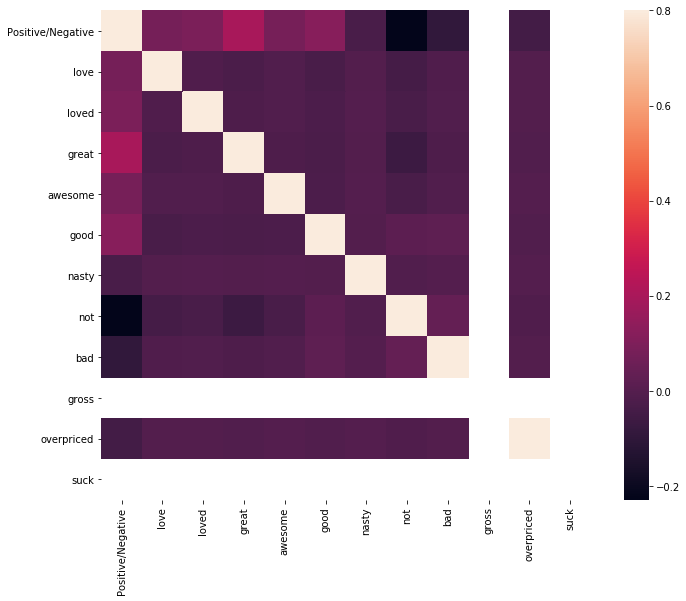

In [10]:
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [11]:
data = df[keywords]
target = df['Positive/Negative']

In [12]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 405


In [13]:
# This shows accuracy is about 60%

Most of the  keywords chosen were pretty common terms you would find in Yelp reviews.  There were a couple of terms chosen that did not show up at all - "gross" and "suck."

# IMBD

In [16]:
df2 = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)

In [17]:
df2.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [18]:
df2.columns = ['Review', 'Positive/Negative']

In [19]:
df2.head()

,Review,Positive/Negative
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [20]:
df2['Positive/Negative'] == 0

0       True
1       True
2       True
3       True
4      False
5       True
6       True
7      False
8       True
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
718    False
719    False
720     True
721     True
722     True
723    False
724    False
725     True
726    False
727    False
728    False
729    False
730    False
731    False
732    False
733    False
734    False
735    False
736    False
737    False
738    False
739    False
740    False
741    False
742     True
743     True
744     True
745     True
746     True
747     True
Name: Positive/Negative, Length: 748, dtype: bool

In [21]:
df2[df2['Positive/Negative'] == 0]

,Review,Positive/Negative
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
8,A bit predictable.,0
15,It had some average acting from the main perso...,0
19,The structure of this film is easily the most...,0
30,The problem was the script.,0


In [22]:
keywords = ['love', 'loved', 'great', 'awesome', 'good', 'nasty', 'not', 'bad', 'gross', 'overpriced', 'suck']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df2[str(key)] = df2['Review'].str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [23]:
df2.dtypes

Review               object
Positive/Negative     int64
love                   bool
loved                  bool
great                  bool
awesome                bool
good                   bool
nasty                  bool
not                    bool
bad                    bool
gross                  bool
overpriced             bool
suck                   bool
dtype: object

                   Positive/Negative      love     loved     great   awesome  \
Positive/Negative           1.000000  0.062200  0.074684  0.106415  0.035432   
love                        0.062200  1.000000  0.077840  0.122513 -0.005234   
loved                       0.074684  0.077840  1.000000  0.116434 -0.003804   
great                       0.106415  0.122513  0.116434  1.000000 -0.007215   
awesome                     0.035432 -0.005234 -0.003804 -0.007215  1.000000   
good                        0.077850  0.140623  0.035132  0.114741 -0.008465   
nasty                       0.035432 -0.005234 -0.003804 -0.007215 -0.001339   
not                        -0.092500  0.084128  0.028352  0.098202 -0.009257   
bad                        -0.169701  0.101503  0.037343  0.054373 -0.008227   
gross                      -0.037781  0.255768 -0.003804  0.185535 -0.001339   
overpriced                       NaN       NaN       NaN       NaN       NaN   
suck                             NaN    

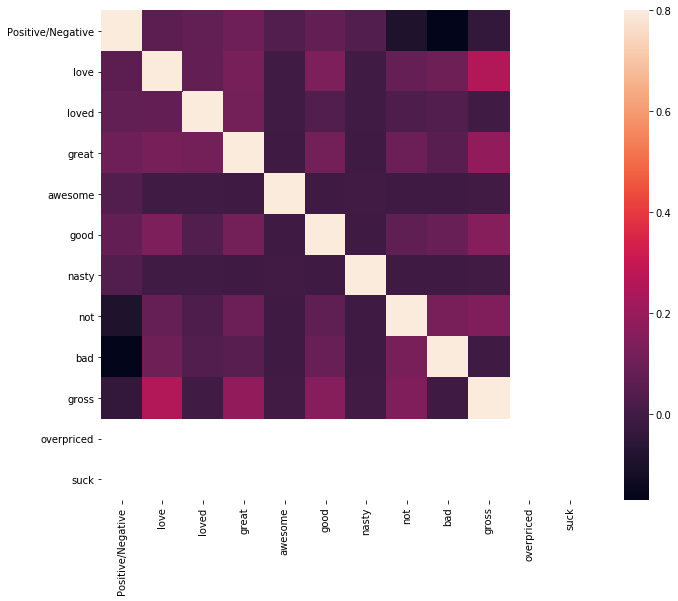

In [24]:
corrmat_2 = df2.corr()
print(corrmat_2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat_2, vmax=.8, square=True)
plt.show()

In [25]:
data_2 = df2[keywords]
target_2 = df2['Positive/Negative']

In [26]:
# Classify, storing the result in a new variable.
y_pred_2 = bnb.predict(data_2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_2.shape[0],
    (target_2 != y_pred_2).sum()
))

Number of mislabeled points out of a total 748 points : 340


In [27]:
340/748

0.45454545454545453

In [28]:
# 55% correct

Most of the keywords chosen had similar results in the IMDB reviews as in the Yelp reviews.  Our testing scored 55% correct on the IMDB dataset and 60% correct with the Yelp dataset testing.  Since the subjects (movie reviews vs Yelp reviews) are reviews of different subject matters, not all of the keywords translated.  "Overpriced" did not show up at all in the IMDB reviews.  "Suck" did not show up again, so that was not a good keyword to use for either dataset.